In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [190]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive
import os
os.chdir("/gdrive/My Drive/")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [191]:
df = pd.read_excel("Iris.xls")
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [193]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
iris            0
dtype: int64

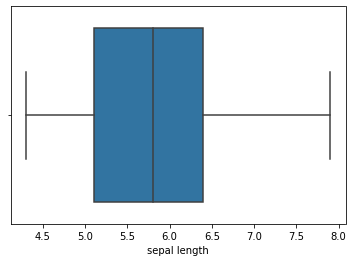

In [194]:
df_sepal_length = df["sepal length"]
sns.boxplot(df_sepal_length)


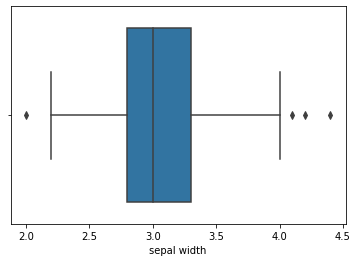

In [195]:
df_sepal_width = df["sepal width"]
sns.boxplot(df_sepal_width)

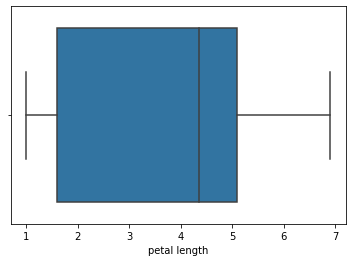

In [196]:
df_petal_length = df["petal length"]
sns.boxplot(df_petal_length)

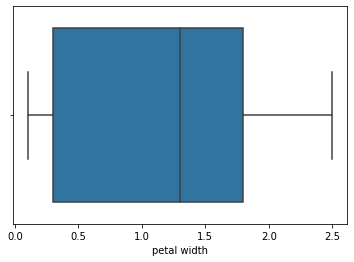

In [197]:
df_petal_width = df["petal width"]
sns.boxplot(df_petal_width)

In [198]:
q1 = df_sepal_width.quantile(0.25)
q3 = df_sepal_width.quantile(0.75)
IQR = q3 - q1 
alt_sinir = q1 - 1.5 * IQR
ust_sinir = q3 + 1.5 * IQR

In [199]:
alt_sinir

2.05

In [200]:
ust_sinir


4.05

In [201]:
df_sepal_width[(df_sepal_width > ust_sinir)] = ust_sinir
df_sepal_width[(df_sepal_width < alt_sinir)] = alt_sinir

In [202]:
df_sepal_width[ust_aykırı]


15    4.05
32    4.05
33    4.05
Name: sepal width, dtype: float64

In [203]:
df_sepal_width[alt_aykırı]


60    2.05
Name: sepal width, dtype: float64

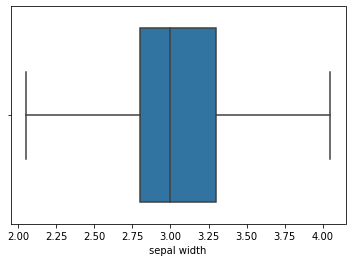

In [204]:
sns.boxplot(df_sepal_width)
df["sepal width"] = df_sepal_width

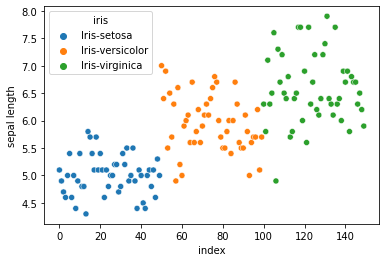

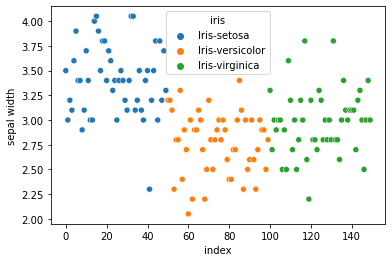

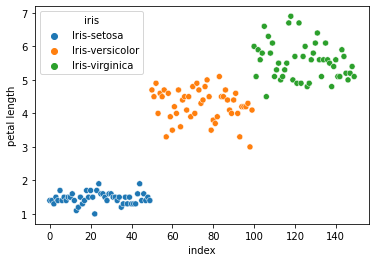

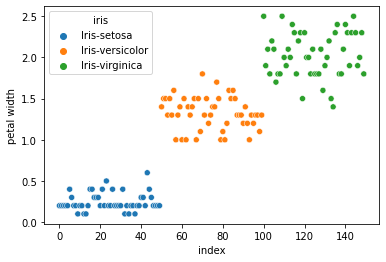

In [205]:
for sutun in df.columns[0:4]:
  sns.scatterplot(x=range(0,150),y=sutun,hue="iris",data=df)
  plt.xlabel("index")
  plt.show()

In [206]:
lab_enc = LabelEncoder()
target = lab_enc.fit_transform(df["iris"])


In [207]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
x = df[["sepal length","sepal width","petal length","petal width"]].values
y = pd.DataFrame(target,columns=["iris"]).values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)


In [208]:
models = [("lr",LogisticRegression(max_iter=1200000)),
          ("knn",KNeighborsClassifier()),
          ("dt",DecisionTreeClassifier()),
          ("nb",GaussianNB()),
          ("svm",SVC()),
          ("rf",RandomForestClassifier()),
           ("xgb",XGBClassifier())]


sonuclar = []
isimler = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_sonuc = cross_val_score(model,x_train,y_train.ravel(),cv=kfold,scoring="accuracy")
    sonuclar.append(cv_sonuc)
    isimler.append(name)
    print(f"{name}: {np.mean(sonuclar)}")

lr: 0.9518181818181819
knn: 0.9518181818181818
dt: 0.9487878787878787
nb: 0.9475000000000001
svm: 0.9483636363636363
rf: 0.9474242424242423
xgb: 0.9467532467532469


In [209]:
knn = KNeighborsClassifier(n_neighbors=5,metric="minkowski")
knn.fit(x_train,y_train.ravel())
tahmin = knn.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,tahmin))

from sklearn.metrics import accuracy_score
print("accuracy degeri: ",accuracy_score(y_test,tahmin))


[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy degeri:  0.9777777777777777
